In [1]:
install_packages = True
if install_packages:
    !conda install tensorflow=2 -y
    !conda install -c anaconda pandas -y
    !conda install -c conda-forge tensorflow-hub -y
    !conda install -c akode html2text -y
    !conda install -c conda-forge tqdm -y
    !conda install -c anaconda scikit-learn -y
    !conda install -c conda-forge matplotlib -y
    !conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Julius\anaconda3\envs\pythonEnv

  added / updated specs:
    - tensorflow=2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         122 KB
    openssl-1.1.1h             |       he774522_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following packages will be UPDATED:

  certifi                anaconda::certifi-2020.6.20-py36_0 --> pkgs/main::certifi-2020.11.8-py36haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                  anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main




openssl-1.1.1h       | 4.8 MB    |            |


PackagesNotFoundError: The following packages are not available from current channels:

  - html2text

Current channels:

  - https://conda.anaconda.org/akode/win-64
  - https://conda.anaconda.org/akode/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Julius\anaconda3\envs\pythonEnv

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.11.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.11.8-py36ha~ --> anaconda::certifi-2020.6.20-py36_0
  openssl                                       conda-forge --> anaconda




openssl-1.1.1h       | 5.8 MB    |     

In [16]:
!conda config --append channels conda-forge

In [17]:
!conda install -c akode html2text -y

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.10.14-0, anaconda/win-64::openssl-1.1.1h-he774522_0
  - anaconda/win-64::openssl-1.1.1h-he774522_0, defaults/win-64::ca-certificates-2020.10.14-0
  - anaconda/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0
  - defaults/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0done

## Package Plan ##

  environment location: C:\Users\Julius\anaconda3\envs\pythonEnv

  added / updated specs:
    - html2text


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    html2text-2020.1.16        |             py_0          33 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          33 KB

The following NEW packages will be INSTALLED:

  html2text          conda-forge/noarch::html2text-202

In [2]:
!which python

Der Befehl "which" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [18]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [20]:
data_path = './videoinfo_AdDHIsjZ7wY_2020_11_24-20_04_55_comments.tab'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

In [21]:
try:
   os.mkdir(output_path)
except OSError:
  print ("Creation of the directory %s failed" % output_path)
else:
  print ("Successfully created the directory %s " % output_path)

Creation of the directory ./output/ failed


In [22]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))
    data.head()

In [23]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
    data.head()

In [24]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

100%|██████████| 390/390 [00:00<00:00, 2698.57it/s]


Removed HTML Tags.
Removed Links.
Removed user names.


In [25]:
if new_embeddings:
  data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
  data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

,publishedAt,authorName,text,isReply,cleaned
0,2020-07-20 11:08:11,Mr. Husky,Go preach climate change to places like India who need the most basic environmental resources to thrive and build culture. The climate debate lacks such real world perspective,0,Go preach climate change to places like India who need the most basic\nenvironmental resources to thrive and build culture. The climate debate lacks\nsuch real world perspective\n\n
1,2020-06-19 23:10:35,jabadaa22aa,"I don&#39;t understand why people are in such a denial. Even Ben Shapiro admits there is a climate change. <a href=""https://www.youtube.com/watch?v=wRk1p8Lzwvo"">https://www.youtube.com/watch?v=wRk1p8Lzwvo</a> <br />The question is how much will it affect us. <br />My question is if we don&#39;t know, but the research clearly shows we are having an effect on the environment, shouldn&#39;t we just adjust because sooner or later we will need to find alternative energy sources?",0,"I don't understand why people are in such a denial. Even Ben Shapiro admits\nthere is a climate change. \nThe question is how much will it affect us. \nMy question is if we don't know, but the research clearly shows we are having\nan effect on the environment, shouldn't we just adjust because sooner or later\nwe will need to find alternative energy sources?\n\n"
2,2019-12-28 13:05:51,j juniper,"Hi Ben, please address things like this. I&#39;d like to know of these reports are real. Thank you.<br /><br /><a href=""https://www.ecowatch.com/pollution-database-trump-toxmap-2641963037.html?share_id=5164455"">https://www.ecowatch.com/pollution-database-trump-toxmap-2641963037.html?share_id=5164455</a>",0,"Hi Ben, please address things like this. I'd like to know of these reports are\nreal. Thank you. \n \n\ntoxmap-2641963037.html?share_id=5164455\n\n"
3,2019-09-26 15:23:06,Not Yo'bidness,"This was more pro &quot;environment alarmism&quot; than against it, disappointed Ben",0,"This was more pro ""environment alarmism"" than against it, disappointed Ben\n\n"
4,2019-08-28 01:15:25,Isabella Diaz,It has been proven that climate change can not be stop we can slow it down and learn how to live with the changing climate. Climate change is real it is ridiculous to think it is not.,0,It has been proven that climate change can not be stop we can slow it down and\nlearn how to live with the changing climate. Climate change is real it is\nridiculous to think it is not.\n\n


In [26]:
hub_url = url_dict[model_type]
if new_embeddings:
  print("Loading model. This will take some time...")
  embed = hub.load(hub_url)

Loading model. This will take some time...


In [27]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

1 The embeddings vector is of fixed length 512


TensorShape([390, 512])

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000001   0.30658093  0.09082633 ...  0.0398619  -0.05970344
  -0.05848472]
 [ 0.30658093  1.0000002   0.05745171 ... -0.03351926 -0.00768856
   0.02512007]
 [ 0.09082633  0.05745171  1.0000005  ... -0.0302204  -0.0542815
   0.10008713]
 ...
 [ 0.0398619  -0.03351926 -0.0302204  ...  0.99999994  0.16027494
   0.03779699]
 [-0.05970344 -0.00768856 -0.0542815  ...  0.16027494  1.0000001
   0.2069282 ]
 [-0.05848472  0.02512007  0.10008713 ...  0.03779699  0.2069282
   1.0000001 ]]


C:\Users\Julius\anaconda3\envs\pythonEnv\lib\site-packages\seaborn\matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Julius\anaconda3\envs\pythonEnv\lib\site-packages\seaborn\matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


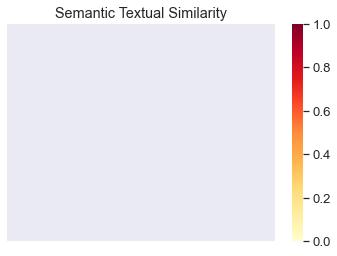

In [31]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 10000

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

In [32]:
comment_index = 324
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

Shame. There is no asteroid, it is man made agenda to sow fear among the
populace. Yet many believe it 😔




In [33]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 20)):
  print("Top similar comment {}: {}".format(i+1, value))

Top similar comment 1: Shame. There is no asteroid, it is man made agenda to sow fear among the
populace. Yet many believe it 😔


Top similar comment 2: Dude, are you kidding yourself? The planet is HUGE compared to your body. Your
body will succumb to this cancer at a rate faster than the planet. Think about
the obvious.


Top similar comment 3: Aaaah I remember back in Ice Age where all the dinosaurs were driving their
cars polluting the environment and the ended up dead.. if only they had one
AOC to warn them...


Top similar comment 4: @ I'm not too sure, anyone who says "The planet isn't warming
because its snowing/cold in *insert small region of Earth*" or "Climate Change
is just a myth created by China/Al Gore/Scientists... for some reason" really
isn't doing a lot of critical thinking. It's not hard to research climate
change, theres been tons of peer-reviewed studies on a multitude of factors.
While many climate alarmist greatly overstated the effects and the timeframe
of Clim